In [246]:
import rioxarray
import matplotlib.pyplot as plt
import xarray

from netCDF4 import Dataset
import numpy as np
from mpl_toolkits.basemap import Basemap
from PIL import Image, ImageDraw, ImageOps

In [247]:
imgpath = 'C:\\AllMyCodes\\OptimizationProject\\OptimizationJourney\\OptimizationinDL\\Data\\25.jpg'

img = Image.open(imgpath)
  
# get width and height
width = img.width
height = img.height
  
# display width and height
print("The height of the image is: ", height)
print("The width of the image is: ", width)

The height of the image is:  357
The width of the image is:  356


In [248]:
fn = 'C:\\AllMyCodes\\OptimizationProject\\OptimizationJourney\\OptimizationinDL\\Data\\3.nc'
data = Dataset(fn, mode='r') # read the data 
print(type(data)) # print the type of the data 
print(data.variables.keys()) # print the variables in the data

<class 'netCDF4._netCDF4.Dataset'>
dict_keys(['lat', 'lon', 'htime', 'fname', 'sid', 'NomDate', 'NomTime', 'sss', 'nchan', 'SubSatLat', 'SubSatLon', 'WindSpd', 'CentPrs', 'CentLat', 'CentLon', 'VZA', 'VSCHN', 'IRWIN', 'IRWVP', 'archer_lat', 'archer_lon', 'archer_combo_score', 'archer_ring_score', 'archer_weak_flag', 'eye_prob', 'eye_comp', 'rad_eye', 'rad_eye_con1', 'rad_eye_con2', 'eye_conf', 'rad_eyewall', 'bt_eye', 'bt_eyewall', 'odt84', 'vlat', 'vlon', 'var_icen', 'ang_icen', 'tavg_icen', 'tmin_icen', 'tmax_icen', 'tstd_icen', 'tnum_icen', 'var_acen', 'ang_acen', 'tavg_acen', 'tmin_acen', 'tmax_acen', 'tstd_acen', 'tnum_acen', 'var_vcen', 'ang_vcen', 'tavg_vcen', 'tmin_vcen', 'tmax_vcen', 'tstd_vcen', 'tnum_vcen'])


In [249]:
lats = data.variables['lat'][:]  
longs = data.variables['lon'][:]
WindSpd = data.variables['WindSpd'][:]
tavg_acen = data.variables['IRWIN']
print(tavg_acen)
min_lat = np.min(lats)
max_lat = np.max(lats)
min_lng = np.min(longs)
max_lng = np.max(longs)
# tave = data.variables['tave'][:]

<class 'netCDF4._netCDF4.Variable'>
int16 IRWIN(htime, lat, lon)
    scale_factor: 0.01
    add_offset: 200.0
    long_name: Brightness Temperature in (10.6-12.5 um)
    units: Kelvin
    _FillValue: -20100
unlimited dimensions: htime
current shape = (1, 301, 301)
filling on


In [250]:
mp = Basemap(projection='merc',
             llcrnrlon=min_lng,   # lower longitude
             llcrnrlat=min_lat,    # lower latitude
             urcrnrlon=max_lng,   # uppper longitude
             urcrnrlat=max_lat,   # uppper latitude
            resolution = 'i')

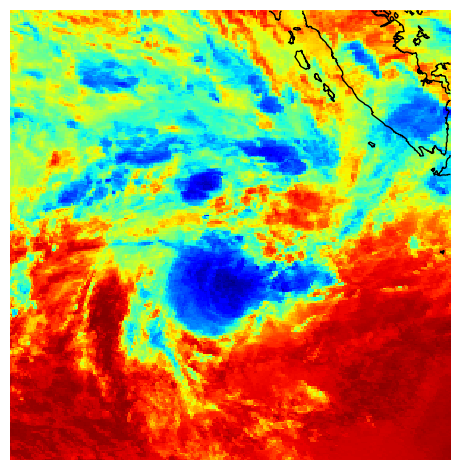

In [251]:
lon, lat = np.meshgrid(longs,lats)  #this converts coordinates into 2D arrray
x,y = mp(lon,lat) #mapping them together 
plt.figure() #figure size 
c_scheme = mp.pcolor(x,y,np.squeeze(tavg_acen[0,:,:]), cmap = 'jet') # [0,:,:] is for the first day of the year
plt.axis('scaled')
# consider this as the outline for the map that is to be created 
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

# cbar = mp.colorbar(c_scheme,location='right',pad = '10%') # map information
# plt.show()
plt.box(False)
plt.tight_layout()
plt.savefig('tave.jpg', dpi=300, bbox_inches='tight', pad_inches=0) #saves the image generated
#
image = Image.open('tave.jpg')
bbox = ImageOps.invert(image).getbbox()
trimmed = image.crop(bbox)
new_image = trimmed.resize((356, 356))
new_image.save('tave_500.jpg')